In [1]:
#!pip install pandas scikit-learn xgboost lightgbm catboost
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, \
RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

C:\Users\krish\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\krish\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\krish\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv('drug200.csv')

In [3]:
def label_encode_categorical(df):
    le = LabelEncoder()
    for column in df.select_dtypes(include='object').columns:
        df[column] = le.fit_transform(df[column])
    return df

In [4]:
data = label_encode_categorical(data)
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [5]:
data['Drug'].unique()

array([0, 3, 4, 1, 2])

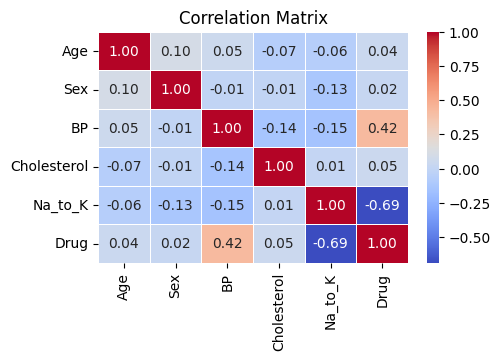

In [6]:
correlation_matrix = data.corr()
plt.figure(figsize=(5,3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [7]:
X = data.drop(columns = ['Drug'])
y = data['Drug']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [10]:
#!pip install pandas scikit-learn xgboost lightgbm catboost
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
GBM = GradientBoostingClassifier()
XGBoost = xgb.XGBClassifier()
LightGBM = lgb.LGBMClassifier()
CatBoost = CatBoostClassifier(silent = True)

In [12]:
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred_et)
print("ExtraTrees: " + str(accuracy_et * 100))


ExtraTrees: 96.0


In [13]:
GBM.fit(X_train, y_train)
y_pred_GBM = GBM.predict(X_test)
accuracy_GBM = accuracy_score(y_test, y_pred_GBM)
print("GBM: " + str(accuracy_GBM * 100))

GBM: 100.0


In [14]:
XGBoost.fit(X_train, y_train)
y_pred_XGBoost = XGBoost.predict(X_test)
accuracy_XGBoost = accuracy_score(y_test, y_pred_XGBoost)
print("XGBoost: " + str(accuracy_GBM * 100))

XGBoost: 100.0


In [15]:
LightGBM.fit(X_train, y_train)
y_pred_LightGBM = LightGBM.predict(X_test)
accuracy_LightGBM = accuracy_score(y_test, y_pred_LightGBM)
print("LightGBM: " + str(accuracy_LightGBM * 100))

LightGBM: 100.0


In [16]:
CatBoost.fit(X_train, y_train)
y_pred_CatBoost = CatBoost.predict(X_test)
accuracy_CatBoost = accuracy_score(y_test, y_pred_CatBoost)
print("CatBoost: " + str(accuracy_CatBoost * 100))

CatBoost: 100.0


In [17]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(28,7))
 plt.rcParams.update({'font.size': 25})
 labels = ['0', '1','2', '3','4']
 cmap=sns.light_palette('lime')
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

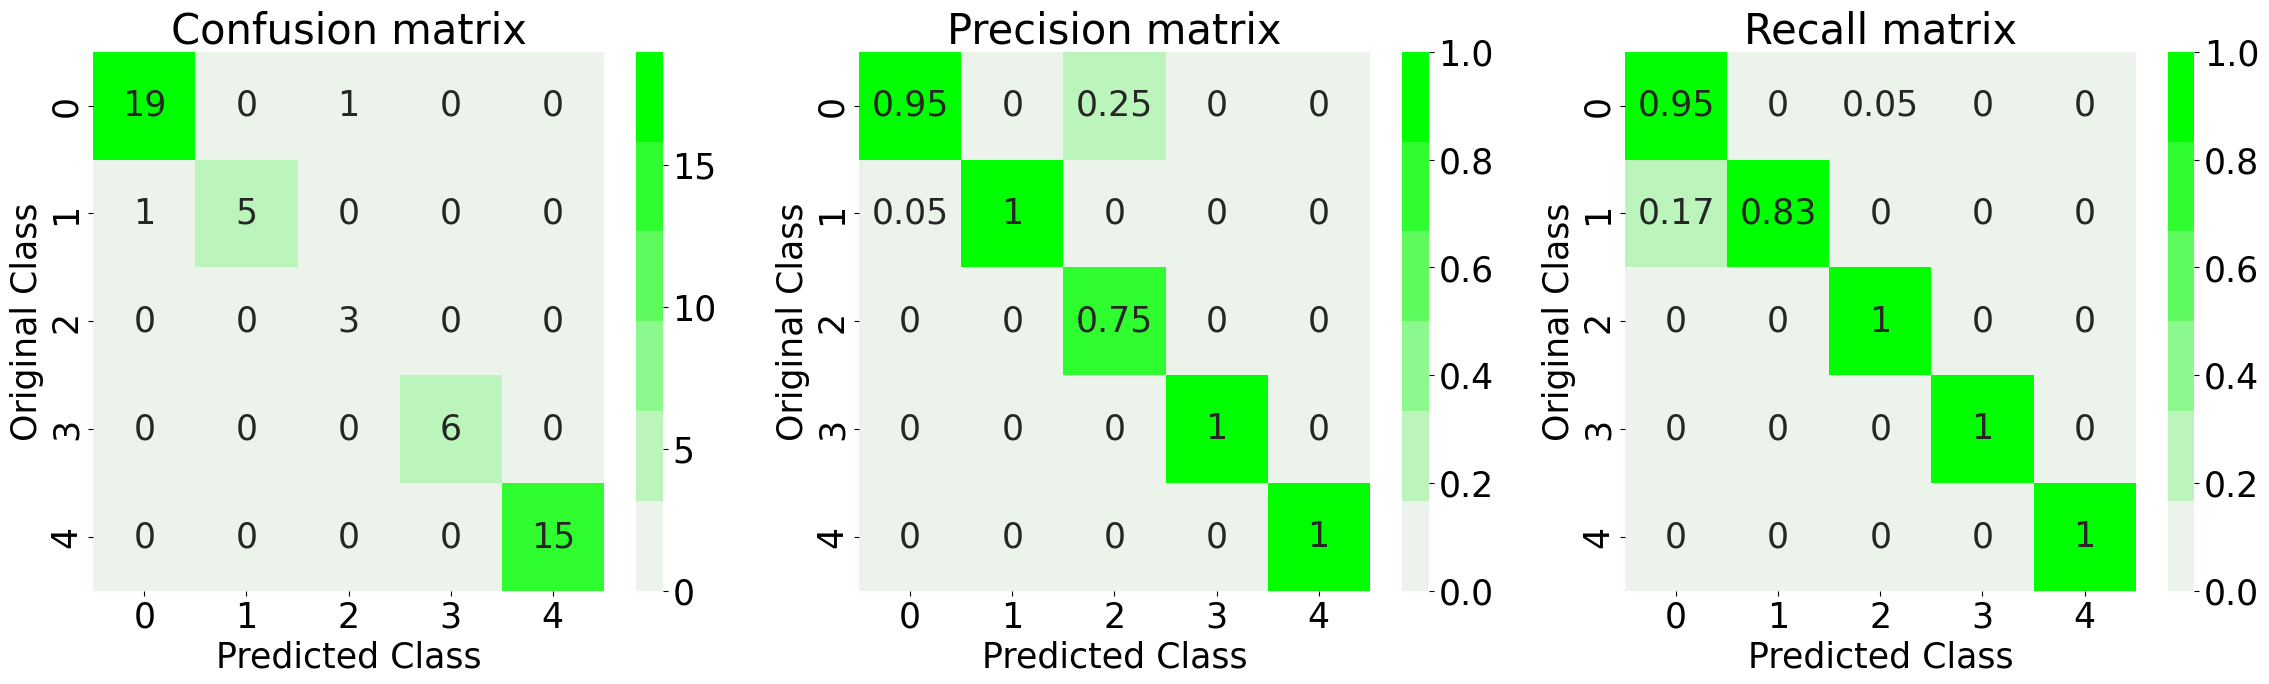

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       1.00      0.83      0.91         6
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        15

    accuracy                           0.96        50
   macro avg       0.94      0.96      0.94        50
weighted avg       0.96      0.96      0.96        50



In [18]:
plot_confusion_matrix(y_test,y_pred_et )
print(classification_report(y_test, y_pred_et ))

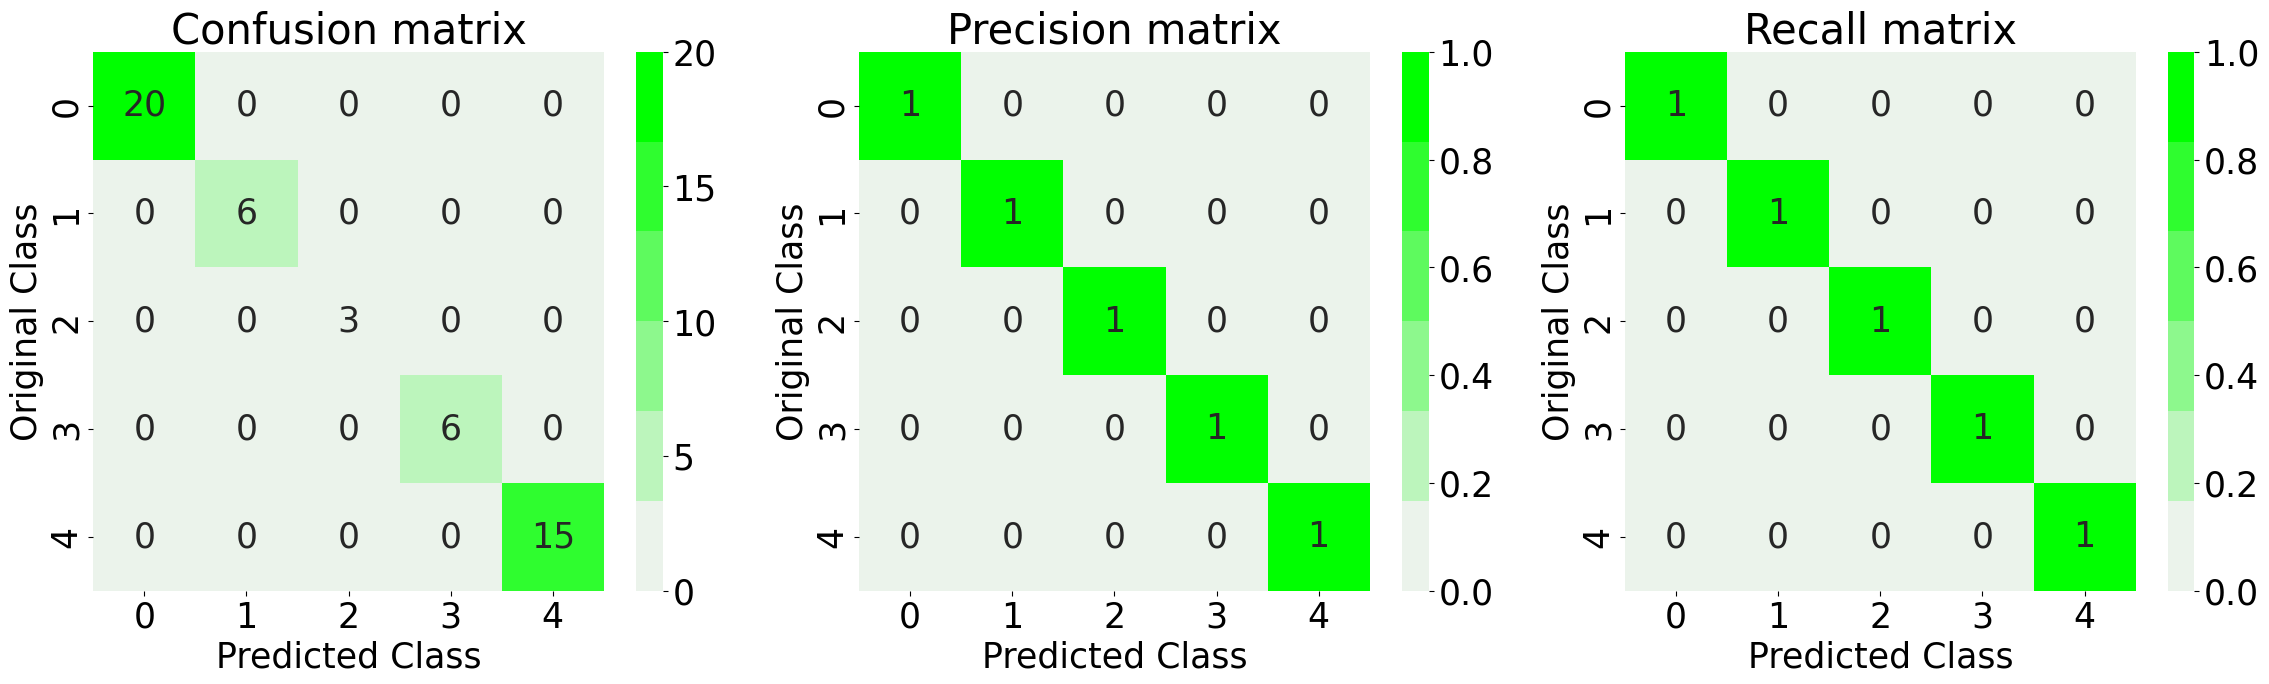

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [19]:
plot_confusion_matrix(y_test, y_pred_GBM)
print(classification_report(y_test, y_pred_GBM))

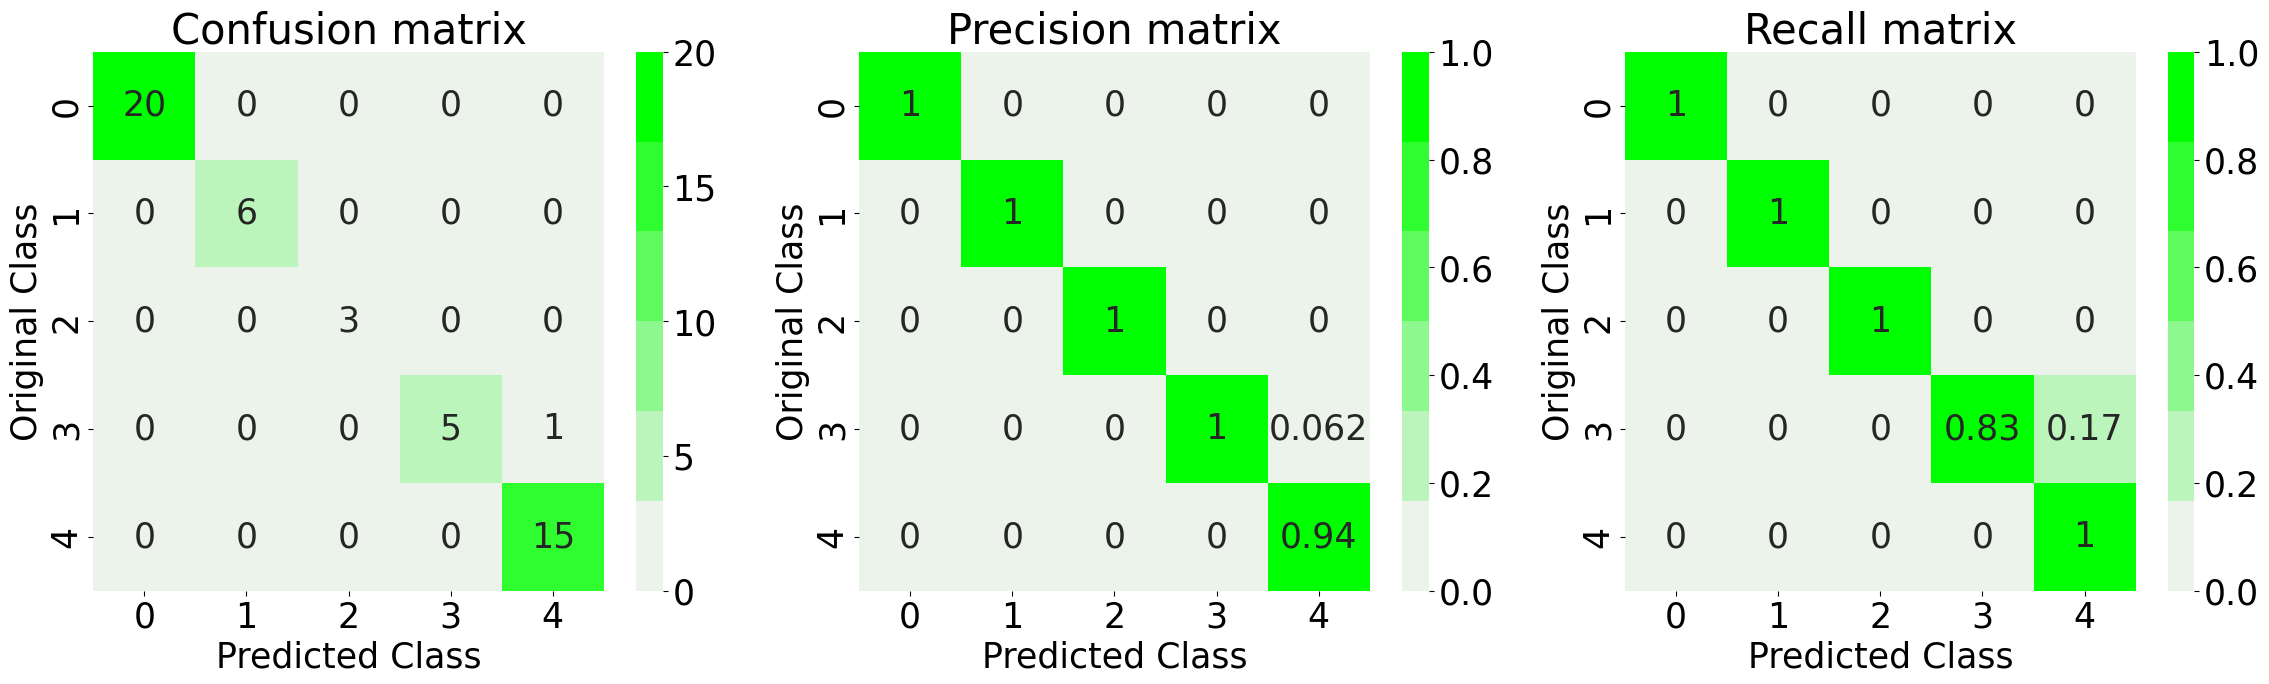

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      0.83      0.91         6
           4       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [20]:
plot_confusion_matrix(y_test, y_pred_XGBoost)
print(classification_report(y_test, y_pred_XGBoost))

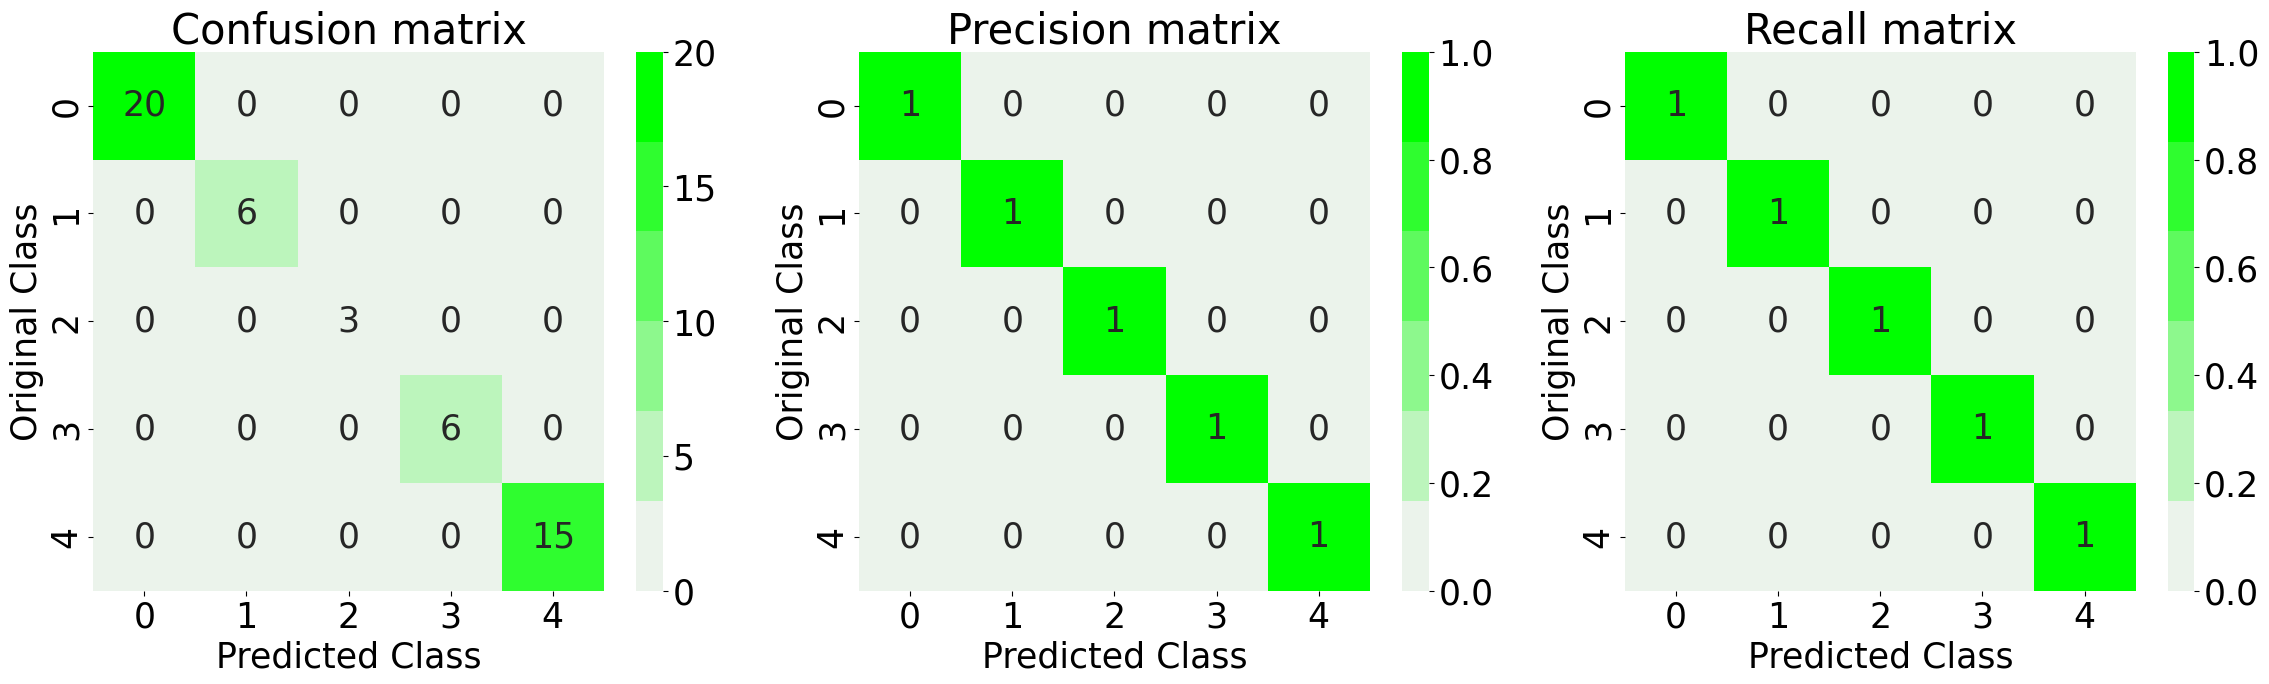

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [21]:
plot_confusion_matrix(y_test, y_pred_LightGBM)
print(classification_report(y_test, y_pred_LightGBM))

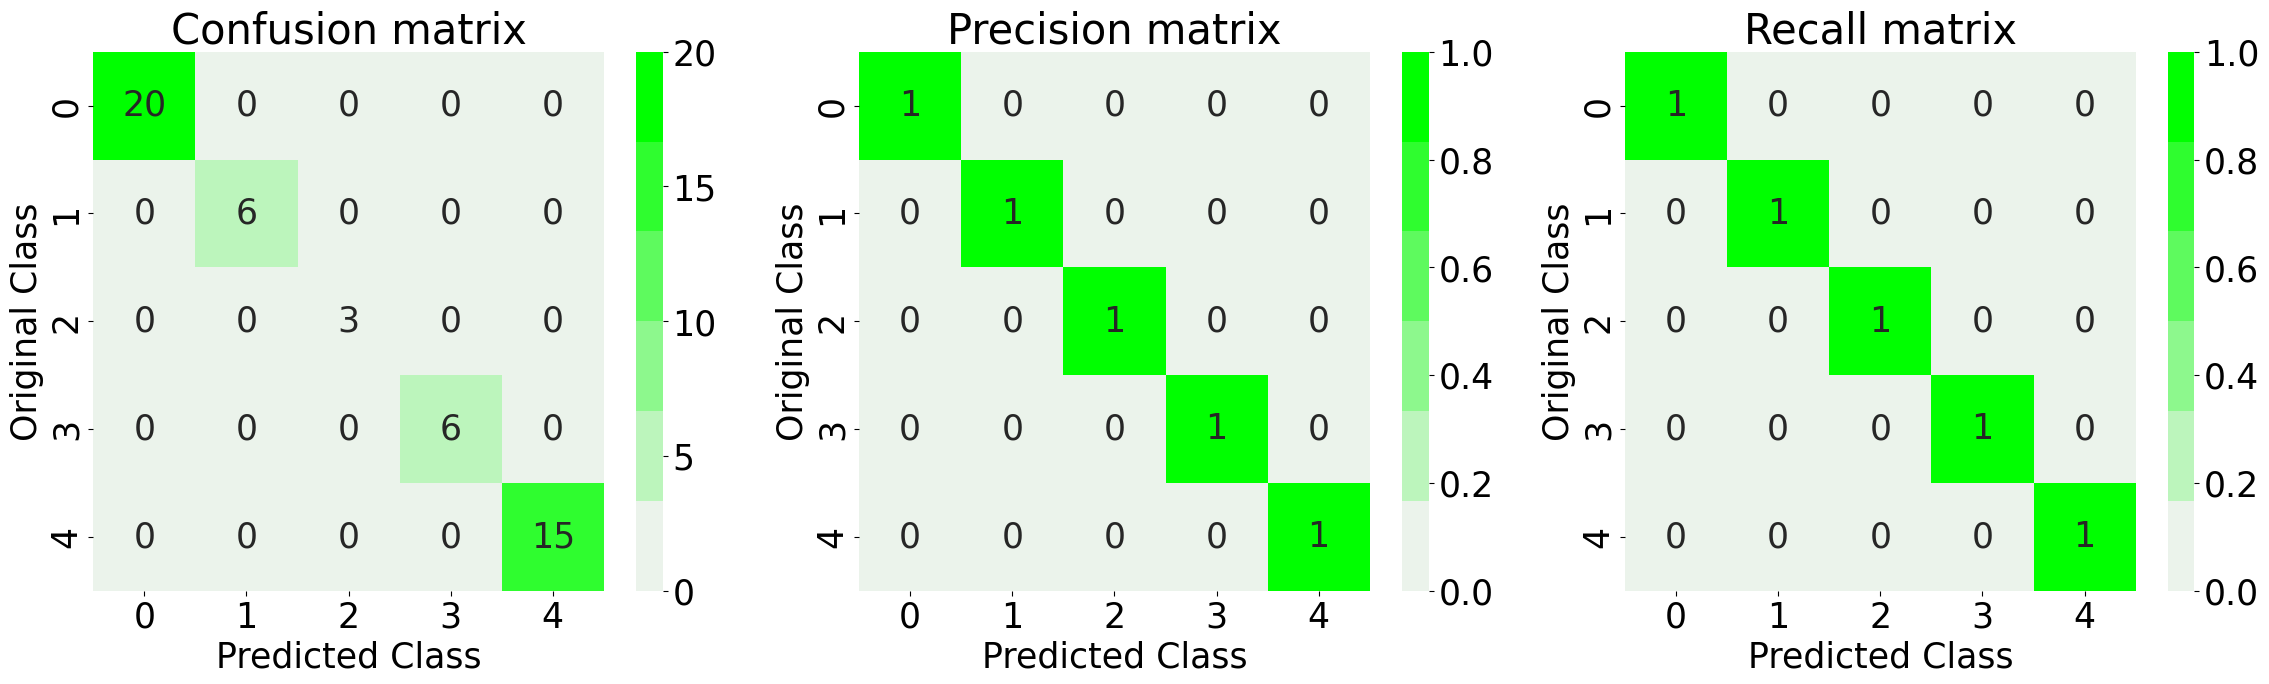

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [22]:
plot_confusion_matrix(y_test, y_pred_CatBoost)
print(classification_report(y_test, y_pred_CatBoost))

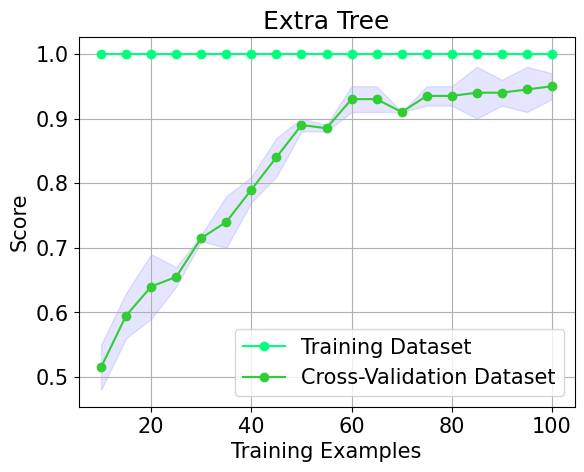

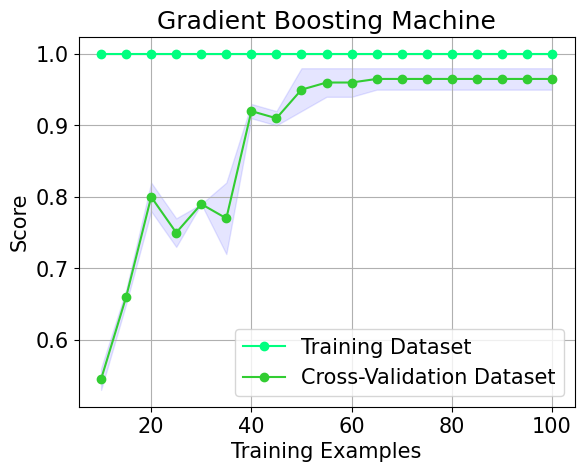

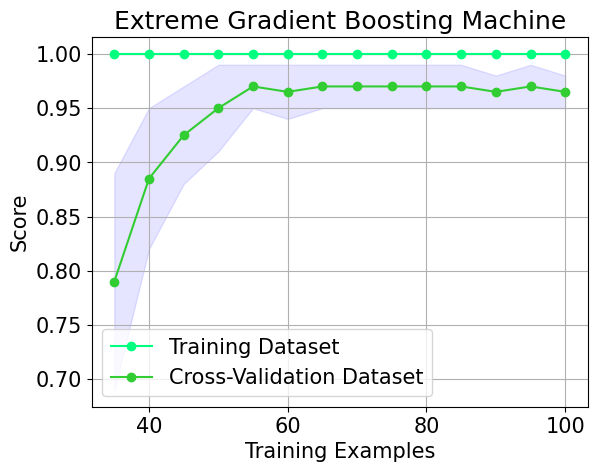

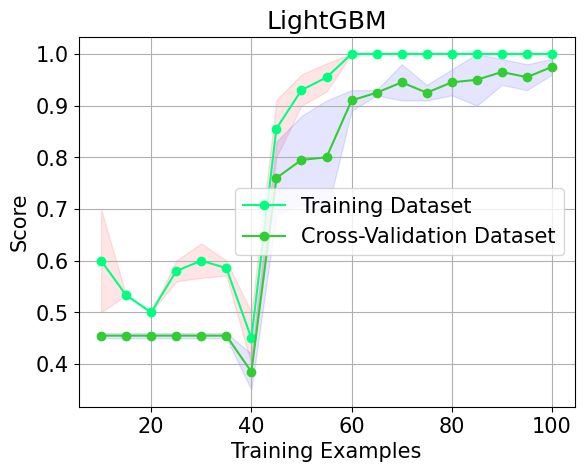

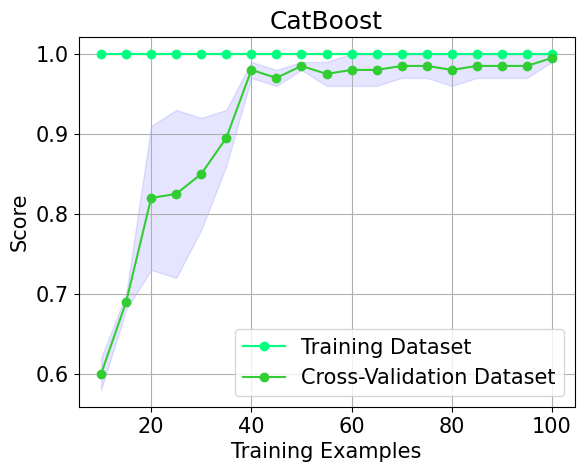

In [23]:

from matplotlib.figure import Figure

from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator,title,X,y,ylim=None,cv = 2, n_jobs = -8, train_sizes=np.linspace(.1, 1.0, 19)):
    plt.figure()
    plt.rcParams.update({'font.size': 15})
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv,n_jobs = n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="springgreen",
             label="Training Dataset")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="limegreen",
             label="Cross-Validation Dataset")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(et,"Extra Tree",X, y) 
g = plot_learning_curve(GBM,"Gradient Boosting Machine",X, y)
g = plot_learning_curve(XGBoost,"Extreme Gradient Boosting Machine",X, y) 
g = plot_learning_curve(LightGBM,"LightGBM",X, y) 
g = plot_learning_curve(CatBoost,"CatBoost",X, y)


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def calculate_learning_curve(estimator, X, y, ylim=None, cv=2, n_jobs=-8, train_sizes=np.linspace(.1, 1.0, 19)):
    if ylim is not None:
        plt.ylim(*ylim)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    return train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std

# Example usage:
et_train_sizes, et_train_scores_mean, et_train_scores_std, et_test_scores_mean, et_test_scores_std = calculate_learning_curve(et, X, y)
GBM_train_sizes, GBM_train_scores_mean, GBM_train_scores_std, GBM_test_scores_mean, GBM_test_scores_std = calculate_learning_curve(GBM, X, y)
XGBoost_train_sizes, XGBoost_train_scores_mean, XGBoost_train_scores_std, XGBoost_test_scores_mean, XGBoost_test_scores_std = calculate_learning_curve(XGBoost, X, y)
LightGBM_train_sizes, LightGBM_train_scores_mean, LightGBM_train_scores_std, LightGBM_test_scores_mean, LightGBM_test_scores_std = calculate_learning_curve(LightGBM, X, y)
CatBoost_train_sizes, CatBoost_train_scores_mean, CatBoost_train_scores_std, CatBoost_test_scores_mean, CatBoost_test_scores_std = calculate_learning_curve(CatBoost, X, y)


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import learning_curve

def calculate_learning_curve(estimator, X, y, ylim=None, cv=2, n_jobs=-8, train_sizes=np.linspace(.1, 1.0, 19)):
    if ylim is not None:
        plt.ylim(*ylim)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    data = {
        'TrainSizes': train_sizes,
        'TrainScoresMean': train_scores_mean,
        'TrainScoresStd': train_scores_std,
        'TestScoresMean': test_scores_mean,
        'TestScoresStd': test_scores_std
    }

    return data

# Example usage:
et_data = calculate_learning_curve(et, X, y)
GBM_data = calculate_learning_curve(GBM, X, y)
XGBoost_data = calculate_learning_curve(XGBoost, X, y)
LightGBM_data = calculate_learning_curve(LightGBM, X, y)
CatBoost_data = calculate_learning_curve(CatBoost, X, y)

# Convert to pandas DataFrame
et_df = pd.DataFrame(et_data)
GBM_df = pd.DataFrame(GBM_data)
XGBoost_df = pd.DataFrame(XGBoost_data)
LightGBM_df = pd.DataFrame(LightGBM_data)
CatBoost_df = pd.DataFrame(CatBoost_data)


In [27]:
CatBoost_df

,TrainSizes,TrainScoresMean,TrainScoresStd,TestScoresMean,TestScoresStd
0,10,1.0,0.0,0.600,0.020
1,15,1.0,0.0,0.690,0.010
2,20,1.0,0.0,0.820,0.090
3,25,1.0,0.0,0.825,0.105
4,30,1.0,0.0,0.850,0.070
5,35,1.0,0.0,0.895,0.035
6,40,1.0,0.0,0.980,0.010
7,45,1.0,0.0,0.970,0.010
8,50,1.0,0.0,0.985,0.005
9,55,1.0,0.0,0.975,0.015


In [28]:
CatBoost_df

,TrainSizes,TrainScoresMean,TrainScoresStd,TestScoresMean,TestScoresStd
0,10,1.0,0.0,0.600,0.020
1,15,1.0,0.0,0.690,0.010
2,20,1.0,0.0,0.820,0.090
3,25,1.0,0.0,0.825,0.105
4,30,1.0,0.0,0.850,0.070
5,35,1.0,0.0,0.895,0.035
6,40,1.0,0.0,0.980,0.010
7,45,1.0,0.0,0.970,0.010
8,50,1.0,0.0,0.985,0.005
9,55,1.0,0.0,0.975,0.015
